<a href="https://colab.research.google.com/github/JenBanks8585/DS-Unit-2-Kaggle-Challenge/blob/master/module2-random-forests/Jen_Banks_DS_222_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 2, Module 2*

---

# Random Forests

## Assignment
- [ ] Read [“Adopting a Hypothesis-Driven Workflow”](https://outline.com/5S5tsB), a blog post by a Lambda DS student about the Tanzania Waterpumps challenge.
- [ ] Continue to participate in our Kaggle challenge.
- [ ] Define a function to wrangle train, validate, and test sets in the same way. Clean outliers and engineer features.
- [ ] Try Ordinal Encoding.
- [ ] Try a Random Forest Classifier.
- [ ] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [ ] Commit your notebook to your fork of the GitHub repo.

## Stretch Goals

### Doing
- [ ] Add your own stretch goal(s) !
- [ ] Do more exploratory data analysis, data cleaning, feature engineering, and feature selection.
- [ ] Try other [categorical encodings](https://contrib.scikit-learn.org/categorical-encoding/).
- [ ] Get and plot your feature importances.
- [ ] Make visualizations and share on Slack.

### Reading

Top recommendations in _**bold italic:**_

#### Decision Trees
- A Visual Introduction to Machine Learning, [Part 1: A Decision Tree](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/),  and _**[Part 2: Bias and Variance](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/)**_
- [Decision Trees: Advantages & Disadvantages](https://christophm.github.io/interpretable-ml-book/tree.html#advantages-2)
- [How a Russian mathematician constructed a decision tree — by hand — to solve a medical problem](http://fastml.com/how-a-russian-mathematician-constructed-a-decision-tree-by-hand-to-solve-a-medical-problem/)
- [How decision trees work](https://brohrer.github.io/how_decision_trees_work.html)
- [Let’s Write a Decision Tree Classifier from Scratch](https://www.youtube.com/watch?v=LDRbO9a6XPU)

#### Random Forests
- [_An Introduction to Statistical Learning_](http://www-bcf.usc.edu/~gareth/ISL/), Chapter 8: Tree-Based Methods
- [Coloring with Random Forests](http://structuringtheunstructured.blogspot.com/2017/11/coloring-with-random-forests.html)
- _**[Random Forests for Complete Beginners: The definitive guide to Random Forests and Decision Trees](https://victorzhou.com/blog/intro-to-random-forests/)**_

#### Categorical encoding for trees
- [Are categorical variables getting lost in your random forests?](https://roamanalytics.com/2016/10/28/are-categorical-variables-getting-lost-in-your-random-forests/)
- [Beyond One-Hot: An Exploration of Categorical Variables](http://www.willmcginnis.com/2015/11/29/beyond-one-hot-an-exploration-of-categorical-variables/)
- _**[Categorical Features and Encoding in Decision Trees](https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931)**_
- _**[Coursera — How to Win a Data Science Competition: Learn from Top Kagglers — Concept of mean encoding](https://www.coursera.org/lecture/competitive-data-science/concept-of-mean-encoding-b5Gxv)**_
- [Mean (likelihood) encodings: a comprehensive study](https://www.kaggle.com/vprokopev/mean-likelihood-encodings-a-comprehensive-study)
- [The Mechanics of Machine Learning, Chapter 6: Categorically Speaking](https://mlbook.explained.ai/catvars.html)

#### Imposter Syndrome
- [Effort Shock and Reward Shock (How The Karate Kid Ruined The Modern World)](http://www.tempobook.com/2014/07/09/effort-shock-and-reward-shock/)
- [How to manage impostor syndrome in data science](https://towardsdatascience.com/how-to-manage-impostor-syndrome-in-data-science-ad814809f068)
- ["I am not a real data scientist"](https://brohrer.github.io/imposter_syndrome.html)
- _**[Imposter Syndrome in Data Science](https://caitlinhudon.com/2018/01/19/imposter-syndrome-in-data-science/)**_


### More Categorical Encodings

**1.** The article **[Categorical Features and Encoding in Decision Trees](https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931)** mentions 4 encodings:

- **"Categorical Encoding":** This means using the raw categorical values as-is, not encoded. Scikit-learn doesn't support this, but some tree algorithm implementations do. For example, [Catboost](https://catboost.ai/), or R's [rpart](https://cran.r-project.org/web/packages/rpart/index.html) package.
- **Numeric Encoding:** Synonymous with Label Encoding, or "Ordinal" Encoding with random order. We can use [category_encoders.OrdinalEncoder](https://contrib.scikit-learn.org/categorical-encoding/ordinal.html).
- **One-Hot Encoding:** We can use [category_encoders.OneHotEncoder](http://contrib.scikit-learn.org/categorical-encoding/onehot.html).
- **Binary Encoding:** We can use [category_encoders.BinaryEncoder](http://contrib.scikit-learn.org/categorical-encoding/binary.html).


**2.** The short video 
**[Coursera — How to Win a Data Science Competition: Learn from Top Kagglers — Concept of mean encoding](https://www.coursera.org/lecture/competitive-data-science/concept-of-mean-encoding-b5Gxv)** introduces an interesting idea: use both X _and_ y to encode categoricals.

Category Encoders has multiple implementations of this general concept:

- [CatBoost Encoder](http://contrib.scikit-learn.org/categorical-encoding/catboost.html)
- [James-Stein Encoder](http://contrib.scikit-learn.org/categorical-encoding/jamesstein.html)
- [Leave One Out](http://contrib.scikit-learn.org/categorical-encoding/leaveoneout.html)
- [M-estimate](http://contrib.scikit-learn.org/categorical-encoding/mestimate.html)
- [Target Encoder](http://contrib.scikit-learn.org/categorical-encoding/targetencoder.html)
- [Weight of Evidence](http://contrib.scikit-learn.org/categorical-encoding/woe.html)

Category Encoder's mean encoding implementations work for regression problems or binary classification problems. 

For multi-class classification problems, you will need to temporarily reformulate it as binary classification. For example:

```python
encoder = ce.TargetEncoder(min_samples_leaf=..., smoothing=...) # Both parameters > 1 to avoid overfitting
X_train_encoded = encoder.fit_transform(X_train, y_train=='functional')
X_val_encoded = encoder.transform(X_train, y_val=='functional')
```

For this reason, mean encoding won't work well within pipelines for multi-class classification problems.

**3.** The **[dirty_cat](https://dirty-cat.github.io/stable/)** library has a Target Encoder implementation that works with multi-class classification.

```python
 dirty_cat.TargetEncoder(clf_type='multiclass-clf')
```
It also implements an interesting idea called ["Similarity Encoder" for dirty categories](https://www.slideshare.net/GaelVaroquaux/machine-learning-on-non-curated-data-154905090).

However, it seems like dirty_cat doesn't handle missing values or unknown categories as well as category_encoders does. And you may need to use it with one column at a time, instead of with your whole dataframe.

**4. [Embeddings](https://www.kaggle.com/learn/embeddings)** can work well with sparse / high cardinality categoricals.

_**I hope it’s not too frustrating or confusing that there’s not one “canonical” way to encode categoricals. It’s an active area of research and experimentation! Maybe you can make your own contributions!**_

### Setup

You can work locally (follow the [local setup instructions](https://lambdaschool.github.io/ds/unit2/local/)) or on Colab (run the code cell below).

In [0]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

train = pd.merge(pd.read_csv(DATA_PATH+'waterpumps/train_features.csv'), 
                 pd.read_csv(DATA_PATH+'waterpumps/train_labels.csv'))
test = pd.read_csv(DATA_PATH+'waterpumps/test_features.csv')
sample_submission = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv')

train.shape, test.shape

((59400, 41), (14358, 40))

In [0]:
#Splitting DF into train and test sets

train, val = train_test_split(train, test_size=0.2)

In [33]:
train.shape, val.shape, test.shape

((47520, 41), (11880, 41), (14358, 40))

In [0]:
# Data Wranggling

def wrangle(X):
    """Wrangle train, validate, and test sets in the same way"""
    
    # Prevent SettingWithCopyWarning
    X = X.copy()
    
    # About 3% of the time, latitude has small values near zero,
    # outside Tanzania, so we'll treat these values like zero.
    X['latitude'] = X['latitude'].replace(-2e-08, 0)
    
    # When columns have zeros and shouldn't, they are like null values.
    # So we will replace the zeros with nulls, and impute missing values later.
    # Also create a "missing indicator" column, because the fact that
    # values are missing may be a predictive signal.
    cols_with_zeros = ['longitude', 'latitude', 'construction_year', 
                       'gps_height', 'population']
    for col in cols_with_zeros:
        X[col] = X[col].replace(0, np.nan)
        X[col+'_MISSING'] = X[col].isnull()
            
    # Drop duplicate columns
    duplicates = ['quantity_group', 'payment_type']
    X = X.drop(columns=duplicates)
    
    # Drop recorded_by (never varies) and id (always varies, random)
    unusable_variance = ['recorded_by', 'id']
    X = X.drop(columns=unusable_variance)
    
    # Convert date_recorded to datetime
    X['date_recorded'] = pd.to_datetime(X['date_recorded'], infer_datetime_format=True)
    
    # Extract components from date_recorded, then drop the original column
    X['year_recorded'] = X['date_recorded'].dt.year
    X['month_recorded'] = X['date_recorded'].dt.month
    X['day_recorded'] = X['date_recorded'].dt.day
    X = X.drop(columns='date_recorded')
    
    # Engineer feature: how many years from construction_year to date_recorded
    X['years'] = X['year_recorded'] - X['construction_year']
    X['years_MISSING'] = X['years'].isnull()
    
    # return the wrangled dataframe
    return X

train = wrangle(train)
val = wrangle(val)
test = wrangle(test)

In [0]:
# The status_group column is the target
target = 'status_group'

# Get a dataframe with all train columns except the target
train_features = train.drop(columns=[target])

# Get a list of the numeric features
numeric_features = train_features.select_dtypes(include='number').columns.tolist()

# Get a series with the cardinality of the nonnumeric features
cardinality = train_features.select_dtypes(exclude='number').nunique()

# Get a list of all categorical features with cardinality <= 50
categorical_features = cardinality[cardinality <= 50].index.tolist()

# Combine the lists 
features = numeric_features + categorical_features

In [0]:
# Arrange data into X features matrix and y target vector 
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

In [0]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


In [38]:
%%time
#using RandomForest

pipeline_rf_class=make_pipeline(
    ce.one_hot.OneHotEncoder(),
    SimpleImputer(),
    RandomForestClassifier(n_jobs=-1,random_state=42, n_estimators=100)
)

pipeline_rf_class.fit(X_train, y_train)
print(pipeline_rf_class.score(X_train, y_train))
print(pipeline_rf_class.score(X_val, y_val))

0.997706228956229
0.8048821548821549
CPU times: user 27 s, sys: 472 ms, total: 27.5 s
Wall time: 11.7 s


In [39]:
#using RandomForest

pipeline_rf=make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy='mean'),
    RandomForestClassifier(n_jobs=-1,random_state=42)
)

pipeline_rf.fit(X_train, y_train)
print(pipeline_rf.score(X_train, y_train))
print(pipeline_rf.score(X_val, y_val))

0.997706228956229
0.8048821548821549


In [0]:
# Checking shape of dataframe before and after encoding
print('X_train shape before encoding', X_train.shape)
encoder= pipeline_rf.named_steps['onehotencoder']
encoded_df=encoder.transform(X_train)
print('X_train shape after encoding', encoded_df.shape)

X_train shape before encoding (47520, 38)
X_train shape after encoding (47520, 182)


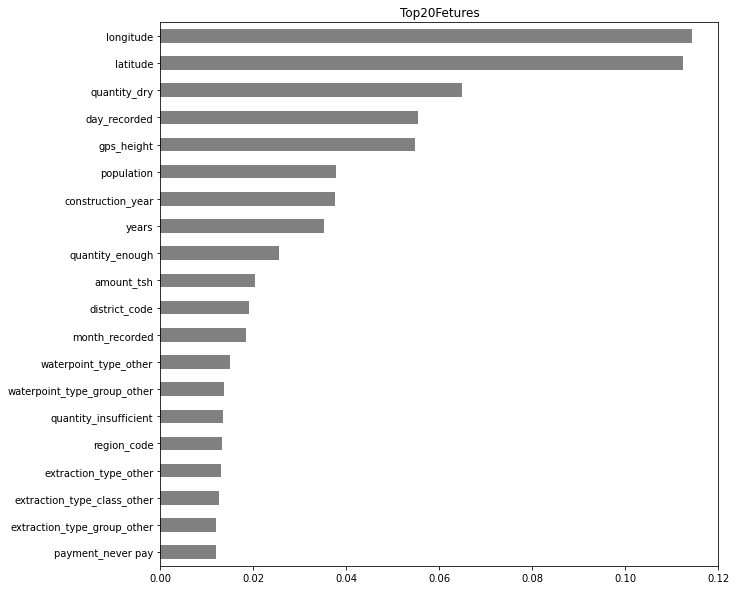

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

rf=pipeline_rf.named_steps['randomforestclassifier']
importances= pd.Series(rf.feature_importances_, encoded_df.columns)

# Plot top n feature importances
n= 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top{n}Fetures')
importances.sort_values()[-n:].plot.barh(color='grey');

### Ordinal Encoding

In [0]:
# Arrange data into X features matrix and y target vector 
X_train = train.drop(columns=target)
y_train = train[target]
X_val = val.drop(columns=target)
y_val = val[target]
X_test = test

In [41]:
#using RandomForest

pipeline_rf_ord=make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier(n_jobs=-1,random_state=42, n_estimators=100)
)

pipeline_rf_ord.fit(X_train, y_train)
print(pipeline_rf_ord.score(X_train, y_train))
print(pipeline_rf_ord.score(X_val, y_val))

0.9999579124579124
0.8064814814814815


In [47]:
# Using Bagging ensemble, no replacement
from sklearn.tree import DecisionTreeClassifier

pipeline_bag1=make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    StandardScaler(),
    BaggingClassifier(DecisionTreeClassifier(),
                      n_estimators=100,
                      max_features=0.6, 
                      max_samples=0.4, 
                      bootstrap=False, 
                      bootstrap_features= False)
)

pipeline_bag1.fit(X_train, y_train)
print(pipeline_bag1.score(X_train, y_train))
print(pipeline_bag1.score(X_val, y_val))

0.9681607744107744
0.8095117845117845


In [0]:
# Checking shape of dataframe before and after encoding
print('X_train shape before encoding', X_train.shape)
encoder= pipeline_rf_ord.named_steps['ordinalencoder']
encoded_df=encoder.transform(X_train)
print('X_train shape after encoding', encoded_df.shape)

X_train shape before encoding (47520, 45)
X_train shape after encoding (47520, 45)


In [0]:
encoder

OrdinalEncoder(cols=['funder', 'installer', 'wpt_name', 'basin', 'subvillage',
                     'region', 'lga', 'ward', 'public_meeting',
                     'scheme_management', 'scheme_name', 'permit',
                     'extraction_type', 'extraction_type_group',
                     'extraction_type_class', 'management', 'management_group',
                     'payment', 'water_quality', 'quality_group', 'quantity',
                     'source', 'source_type', 'source_class', 'wate...
dtype: int64},
                        {'col': 'waterpoint_type', 'data_type': dtype('O'),
                         'mapping': communal standpipe             1
hand pump                      2
other                          3
communal standpipe multiple    4
improved spring                5
cattle trough                  6
dam                            7
NaN                           -2
dtype: int64},
                        {'col': 'waterpoint_type_group',
                         'data_ty

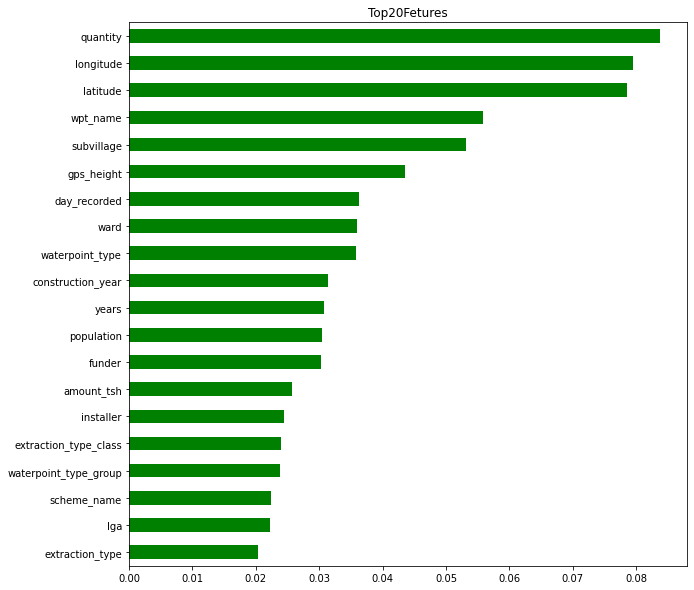

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

rf=pipeline_rf_ord.named_steps['randomforestclassifier']
importances= pd.Series(rf.feature_importances_, encoded_df.columns)

# Plot top n feature importances
n= 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top{n}Fetures')
importances.sort_values()[-n:].plot.barh(color='green');

### Understand how categorical encodings affect trees differently compared to linear models


In [0]:
feature='extraction_type_class'

In [0]:
X_train[feature].value_counts()

gravity         21503
handpump        13152
other            5143
submersible      4915
motorpump        2358
rope pump         361
wind-powered       88
Name: extraction_type_class, dtype: int64

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


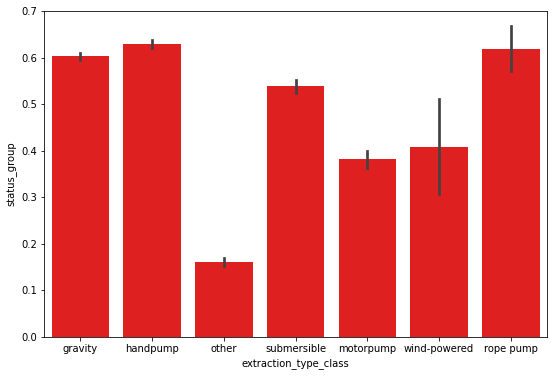

In [0]:
import seaborn as sns

plt.figure(figsize=(9,6))
sns.barplot(
    x=train[feature],
    y=train['status_group']=='functional',
    color='red'
);

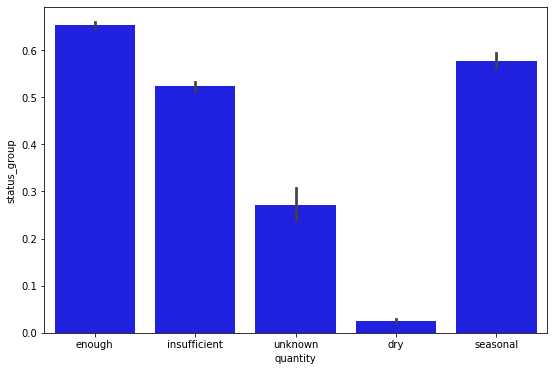

In [0]:

plt.figure(figsize=(9,6))
sns.barplot(
    x=train['quantity'],
    y=train['status_group']=='functional',
    color='blue'
);

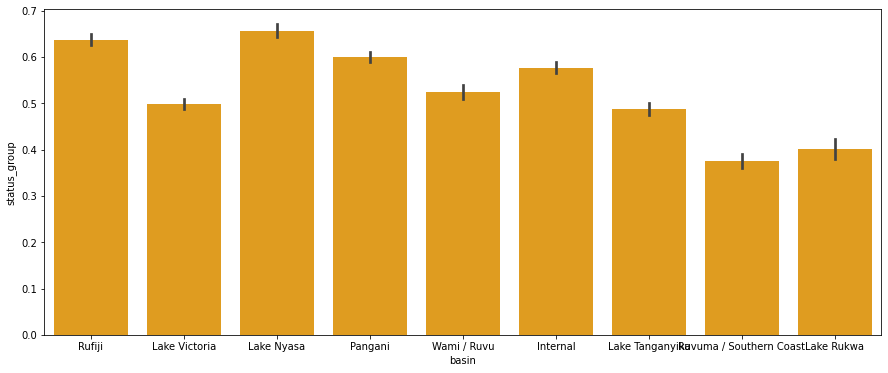

In [0]:
plt.figure(figsize=(15,6))
sns.barplot(
    x=train['basin'],
    y=train['status_group']=='functional',
    color='orange'
);


In [0]:
# Onehot encoding for 'extraction_type_class' feature

encoder=ce.OneHotEncoder(use_cat_names=True)
encoded=encoder.fit_transform(X_train['extraction_type_class'])
print(f'{len(encoded.columns)} columns')
encoded.head(20)

7 columns


,extraction_type_class_gravity,extraction_type_class_handpump,extraction_type_class_other,extraction_type_class_submersible,extraction_type_class_motorpump,extraction_type_class_wind-powered,extraction_type_class_rope pump
32796,1,0,0,0,0,0,0
19075,0,1,0,0,0,0,0
36718,1,0,0,0,0,0,0
2039,0,0,1,0,0,0,0
45672,1,0,0,0,0,0,0
35672,1,0,0,0,0,0,0
6400,1,0,0,0,0,0,0
8342,1,0,0,0,0,0,0
15219,0,0,1,0,0,0,0
22241,1,0,0,0,0,0,0


In [0]:
# OneHot Encoding, Logistic Regression, Validation Accuracy

from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import  StandardScaler

lr= make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    StandardScaler(),
    LogisticRegressionCV(multi_class='auto', solver= 'lbfgs', n_jobs=-1)
)

lr.fit(X_train[['extraction_type_class']],y_train)
score=lr.score(X_train[['extraction_type_class']],y_train)
print('Logistic Regression, Validation Accuracy', score)

Logistic Regression, Validation Accuracy 0.6240319865319865


In [0]:
# OneHot Encoding, DecisionTree, Validation Accuracy

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import  StandardScaler

dt= make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    
    DecisionTreeClassifier(random_state=42)
)

dt.fit(X_train[['extraction_type_class']],y_train)
score=dt.score(X_train[['extraction_type_class']],y_train)
print('Decision Tree, Validation Accuracy', score)

Decision Tree, Validation Accuracy 0.6240319865319865


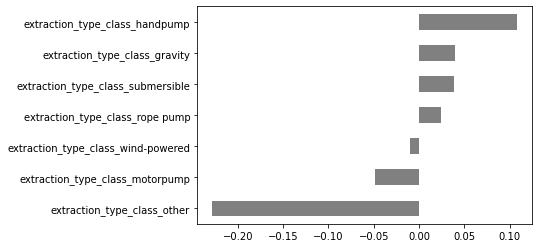

In [0]:
# OneHot Encoding, Logistic Regression, Model Interpretation

model =lr.named_steps['logisticregressioncv']
encoder=lr.named_steps['onehotencoder']
encoded_columns=encoder.transform(X_val[['extraction_type_class']]).columns
coefficients=pd.Series(model.coef_[0], encoded_columns)
coefficients.sort_values().plot.barh(color='grey');

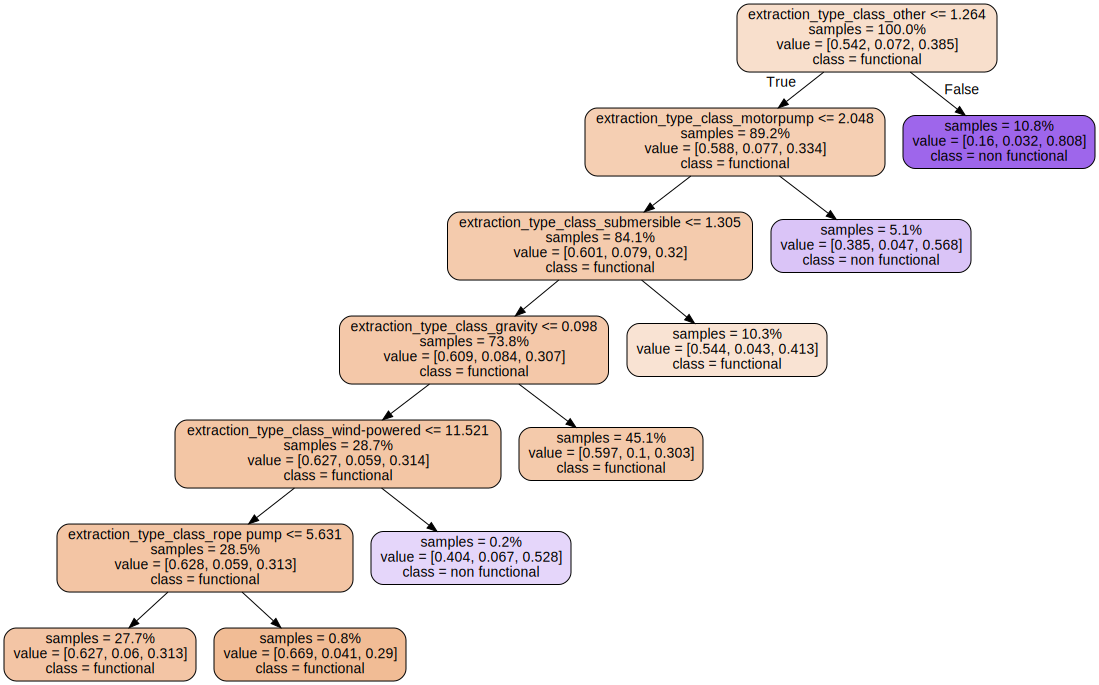

In [0]:
# OneHot Encoding, Decision Tree, Model Interpretation

import graphviz
from sklearn.tree import export_graphviz

model =dt.named_steps['decisiontreeclassifier']
encoder=dt.named_steps['onehotencoder']
encoded_columns=encoder.transform(X_val[['extraction_type_class']]).columns

dot_data=export_graphviz(model,
                         out_file=None,
                         max_depth= 7,
                         feature_names=encoded_columns,
                         class_names= model.classes_,
                         impurity=False,
                         filled=True,
                         proportion=True,
                         rounded=True)
display(graphviz.Source(dot_data))

### Parts below is for extra exploration on other encoding methods. (Not done)

###Mean Encoding

In [0]:
#means=X_train.groupby('waterpoint_type').target.mean()
#train_new[col+'_mean_target']=train_new['waterpoint_type'].map(means)
#val_new[col+'_mean_target']=val_new['waterpoint_type'].map(means)
#means

In [0]:
CatBoostRegressor class with array-like data
from catboost import CatBoostRegressor
# Initialize data

train_data = [[1, 4, 5, 6],
              [4, 5, 6, 7],
              [30, 40, 50, 60]]

eval_data = [[2, 4, 6, 8],
             [1, 4, 50, 60]]

train_labels = [10, 20, 30]
# Initialize CatBoostRegressor
model = CatBoostRegressor(iterations=2,
                          learning_rate=1,
                          depth=2)
# Fit model
model.fit(train_data, train_labels)
# Get predictions
preds = model.predict(eval_data)

In [49]:
pip install catboost

     |████████████████████████████████| 64.4MB 64kB/s 


In [0]:
from catboost import Pool, CatBoostClassifier

In [51]:
# Initialize CatBoostClassifier
model = CatBoostClassifier(iterations=10,
                           learning_rate=1,
                           depth=2,
                           loss_function='MultiClass')
# Fit model
model.fit(X_train, y_train)
# Get predicted classes
preds_class = model.predict(X_val, y_val)
# Get predicted probabilities for each class
preds_proba = model.predict_proba(X_val, y_val)
# Get predicted RawFormulaVal
preds_raw = model.predict((X_val, y_val), 
                          prediction_type='RawFormulaVal')

CatBoostError: ignored